<a href="https://colab.research.google.com/github/AfnanAbouElwafa/Credit-Card-Fraud-Detection/blob/main/SVM_%26_Under_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies

In [49]:
import pandas as pd 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

Data collection

In [40]:
data = pd.read_csv('/content/creditcard.csv')

In [41]:
#how many data points per class 
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Random Under-Sampling

class 0: (284315, 31)
class 1: (492, 31)
total class of 1 and 0: 0    492
1    492
Name: Class, dtype: int64


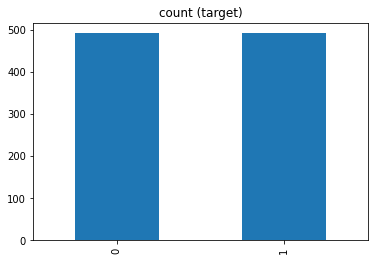

In [42]:
#separating the class that will be 0 and class 1.

# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1] 
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Class'].value_counts())
# plot the count after under-sampeling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')

Spliting data to training and testing data

In [43]:
y = test_under.pop('Class')
X = test_under
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)

Data scaling

In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("x train min after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("x train max after scaling:\n {}".format(X_train_scaled.max(axis=0)))

x train min after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
x train max after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Model training

In [45]:
svm = SVC(C=40)
svm.fit(X_train_scaled, y_train)

SVC(C=40)

Model evaluation

In [46]:
print("Training accuracy:\n{:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Testing accuracy:\n{:.3f}".format(svm.score(X_test_scaled, y_test)))

Training accuracy:
0.967
Testing accuracy:
0.929


In [50]:
y_pred = svm.predict(X_test_scaled)
recall = recall_score (y_test,y_pred)
print("Recall:\n{:.3f}".format(recall))

Recall:
0.887
